# **MIDTERM EXAM**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

**Load Dataset**

In [2]:
data = pd.read_csv('googleplaystore.csv')

**1. Data Cleaning and Preparation**

In [3]:
# Handle missing values
data.dropna(inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Convert fields to int
data['Reviews'] = data['Reviews'].astype(int)

# Converting 'Size' to int
data['Size'] = data['Size'].astype(str).str.replace('M', 'e+6').str.replace('k', 'e+3').replace('Varies with device', 0)
data['Size'] = pd.to_numeric(data['Size'])

# Convert 'Installs' to int
data['Installs'] = data['Installs'].astype(str).str.replace(',', '').str.replace('+', '').astype(int)

# Replace 'Free' in the 'Type' column with '0'
data['Type'] = data['Type'].replace('Free', '0')
data['Type'] = data['Type'].replace('Paid', '1')

# Content Rating to numbers
data['Content Rating'] = data['Content Rating'].replace('Everyone', 1)
data['Content Rating'] = data['Content Rating'].replace('Teen', 2)
data['Content Rating'] = data['Content Rating'].replace('Everyone 10+', 3)
data['Content Rating'] = data['Content Rating'].replace('Mature 17+', 4)
data['Content Rating'] = data['Content Rating'].replace('Adults only 18+', 5)
data['Content Rating'] = data['Content Rating'].replace('Unrated', 6)

# 'Price' to float and replace 'Free' with 0
data['Price'] = data['Price'].str.replace('$', '').replace('Free', '0').astype(float)

# Remove rows with values 6, 7, and 8 in the 'Rating' column
data = data[~data['Rating'].isin([6, 7, 8])]

**2. Exploratory Data Analysis (EDA)**

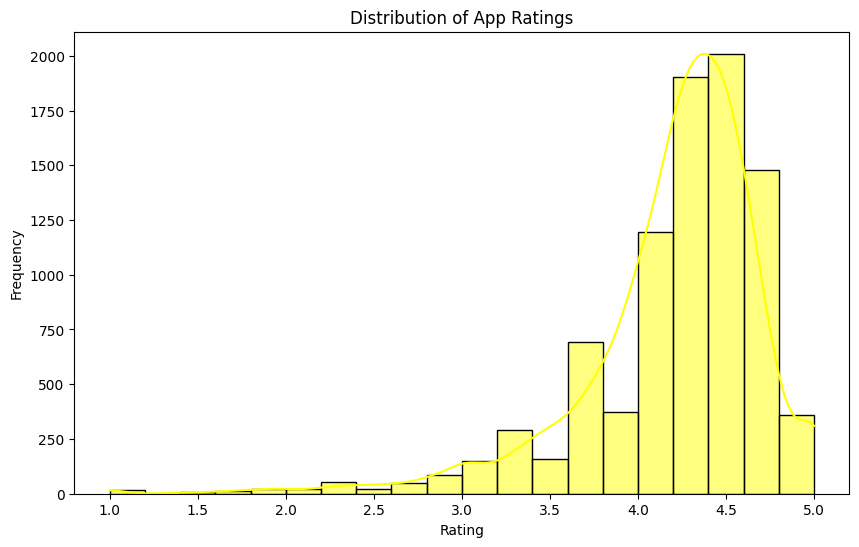

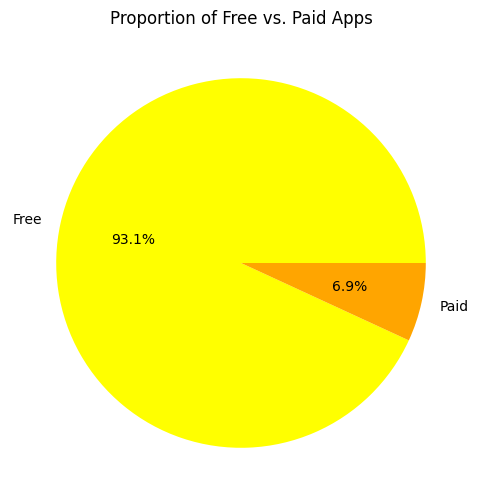

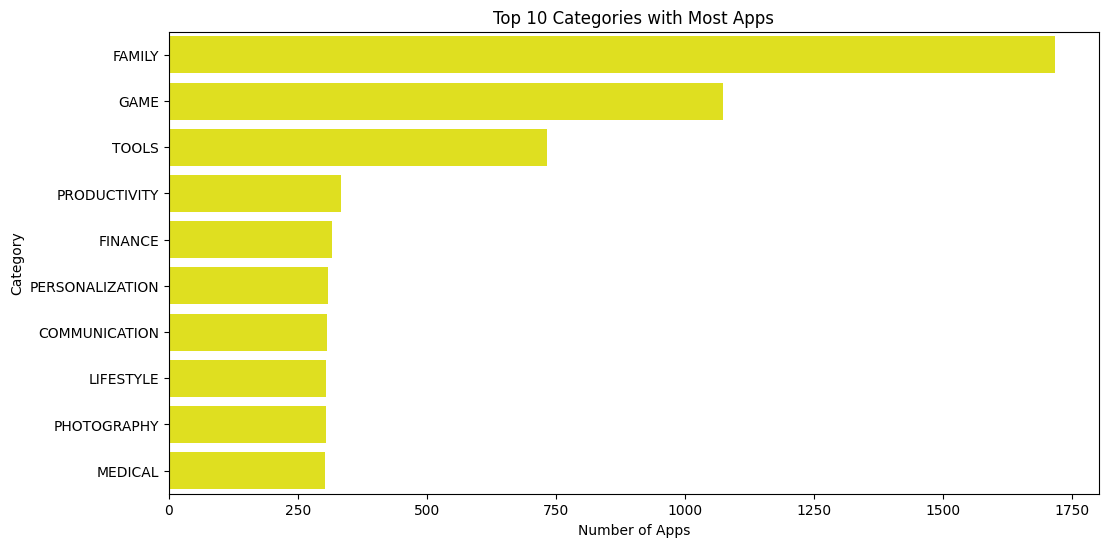

In [9]:
# Analyze the distribution of app ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True, color='yellow')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Understand the proportion of free vs. paid apps
plt.figure(figsize=(8, 6))
labels = ['Free', 'Paid']
data['Type'].replace({0: 'Free', 1: 'Paid'}).value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'orange'], labels=labels)
plt.title('Proportion of Free vs. Paid Apps')
plt.ylabel('')
plt.show()

# Identify which categories have the most apps
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index[:10], color = 'yellow')
plt.title('Top 10 Categories with Most Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()


**3. Category Analysis**

In [10]:
#highest average rating
category_rating = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("Category with the Highest Average Rating:", category_rating.idxmax(), ", Average rating:", round(category_rating.max(), 2))

# most reviews
category_reviews = data.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
print("Category with the Most Reviews:", category_reviews.idxmax(), ", Total reviews:", category_reviews.max())

# most apps
category_apps_count = data['Category'].value_counts()
print("Category with the Most Apps:", category_apps_count.idxmax(), ", Total apps:", category_apps_count.max())

Category with the Highest Average Rating: EVENTS , Average rating: 4.44
Category with the Most Reviews: GAME , Total reviews: 1415533878
Category with the Most Apps: FAMILY , Total apps: 1717


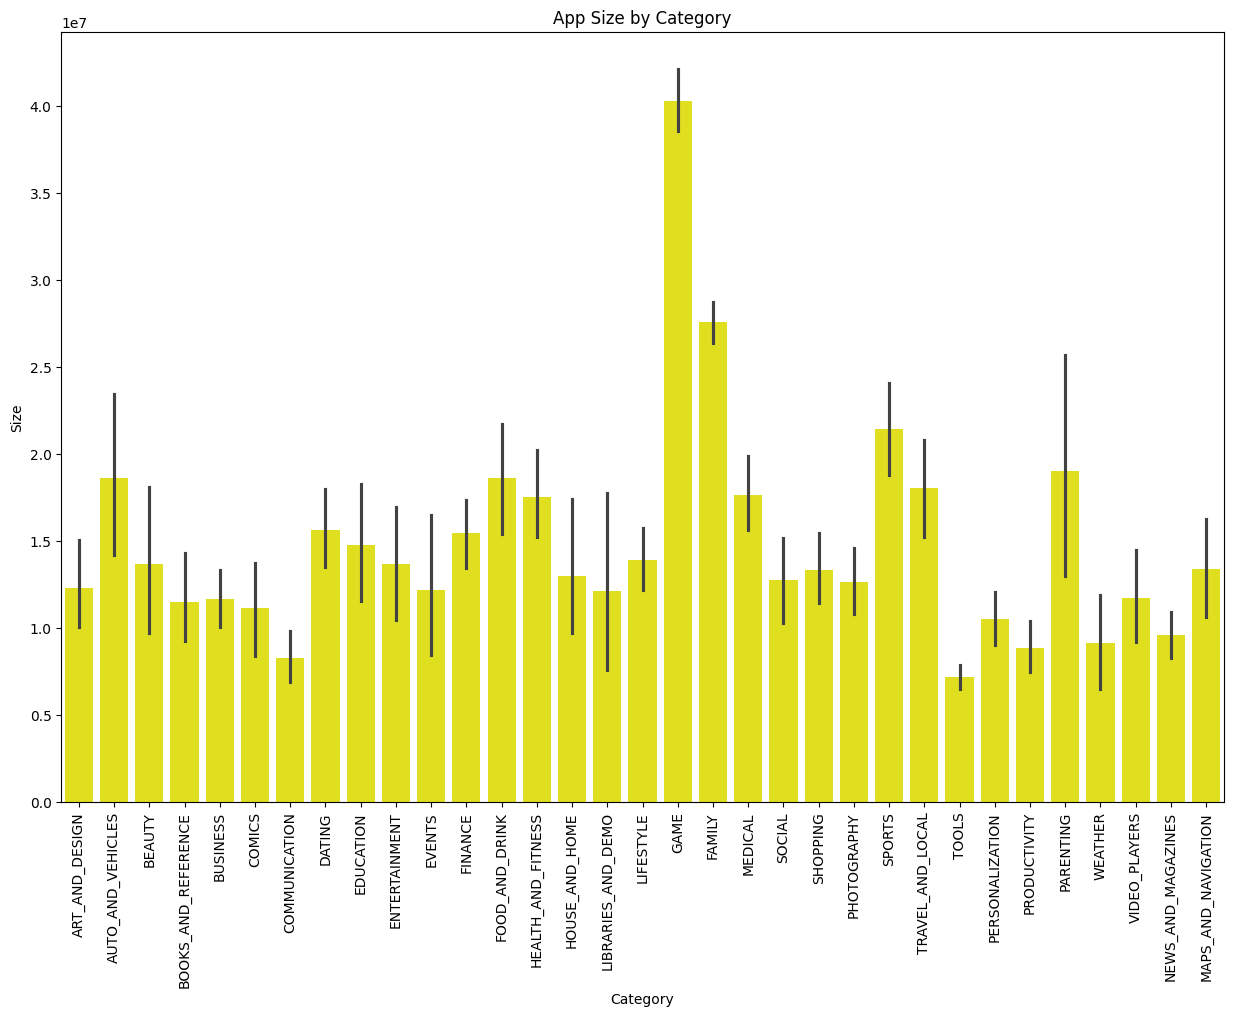

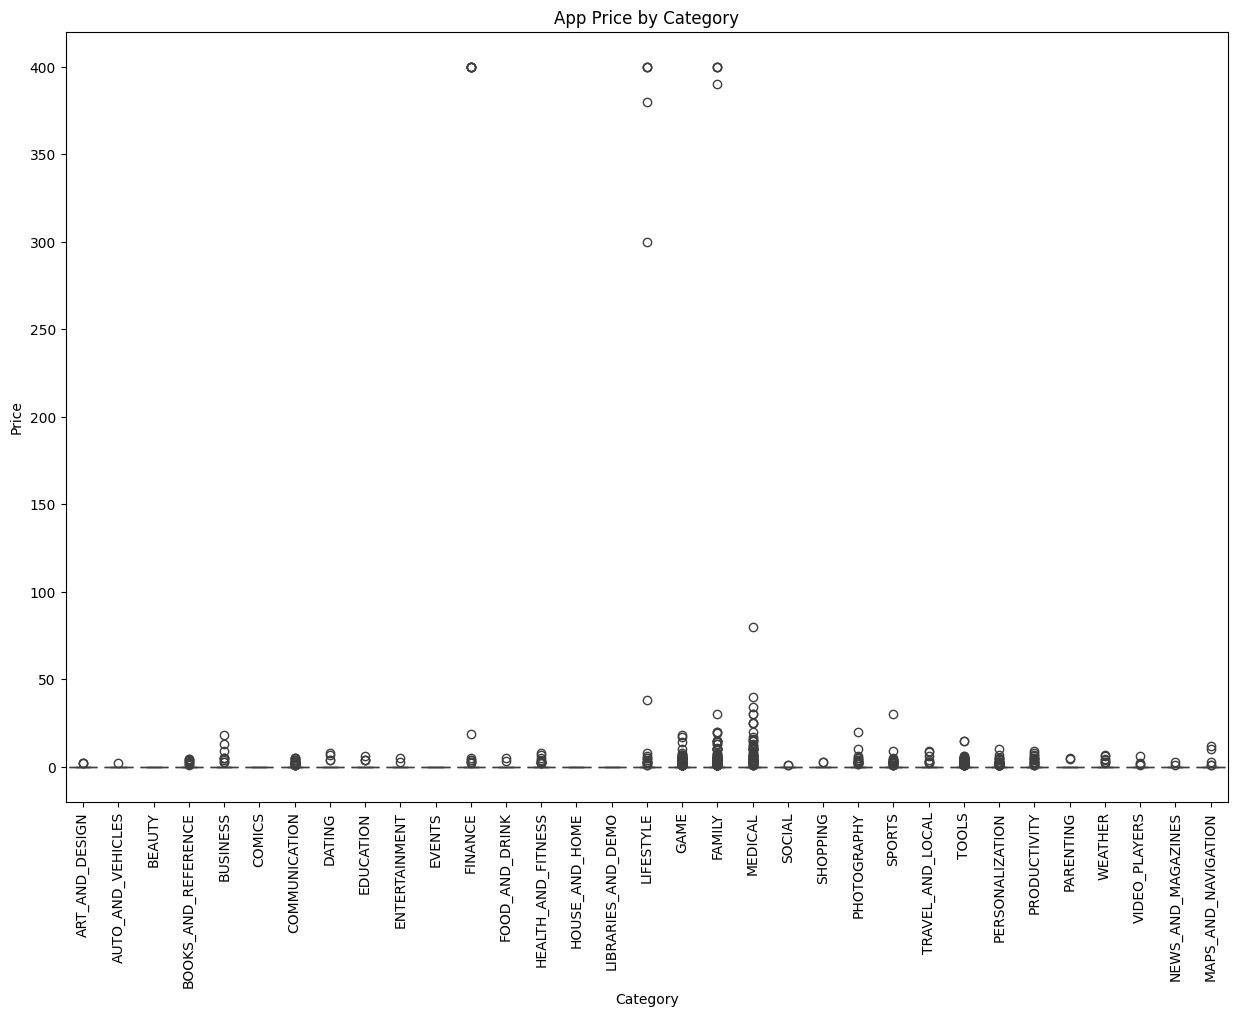

In [45]:
# relationship between category and app size
plt.figure(figsize=(15, 10))
sns.barplot(x='Category', y='Size', data=data, color = 'yellow')
plt.title('App Size by Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Size')
plt.show()

# relationship between category and app price
plt.figure(figsize=(15, 10))
sns.boxplot(x='Category', y='Price', data=data)
plt.title('App Price by Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

**4. Rating Prediction Model**

In [18]:
# Selecting features
features = ['Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']
X = data[features]
y = data['Rating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2719180345797263


**5. Trend Analysis**

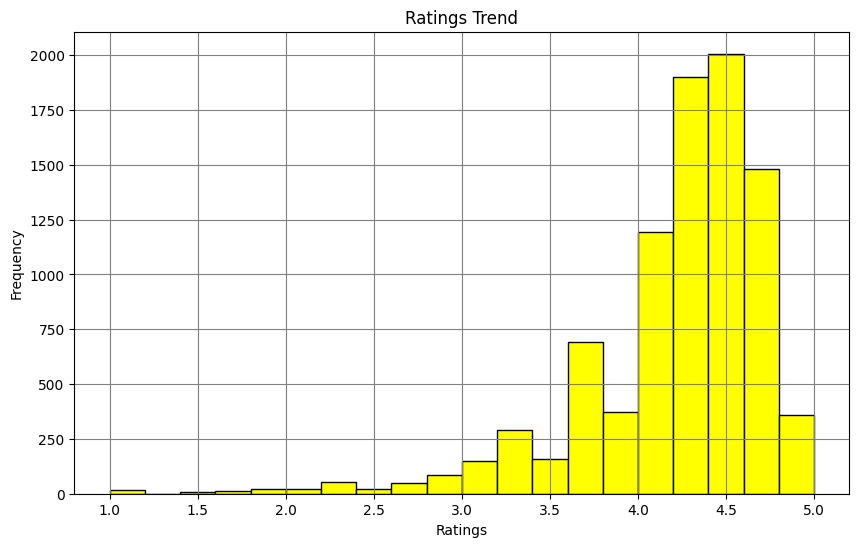

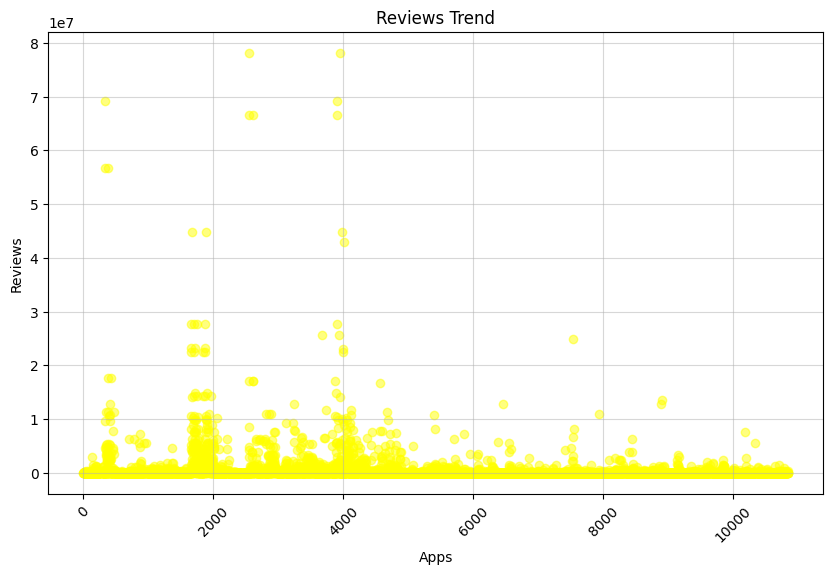

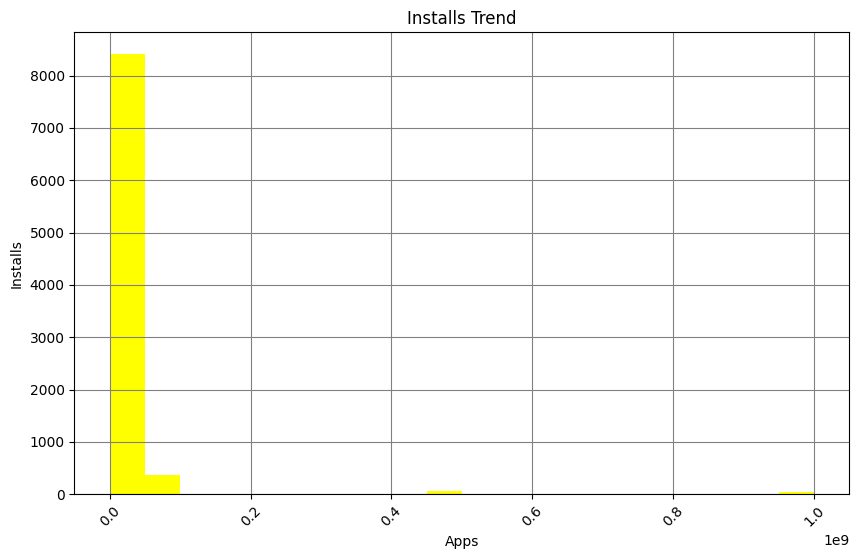

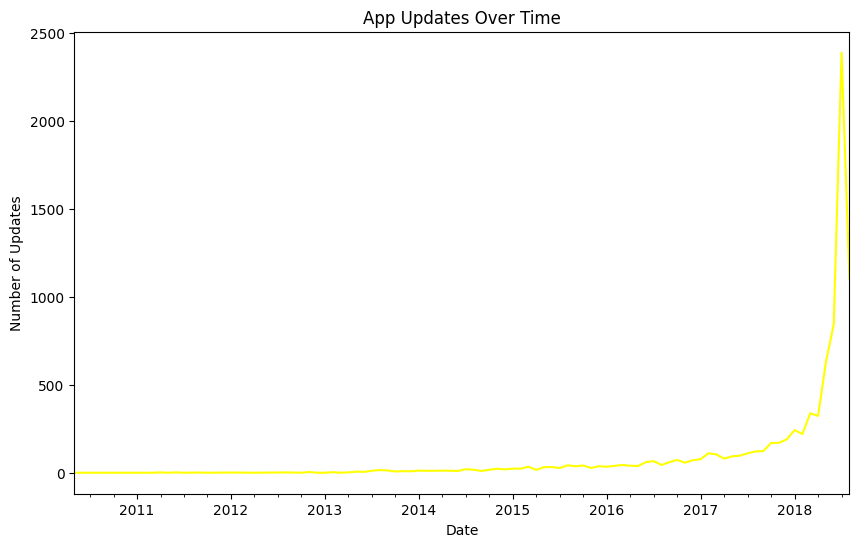

In [47]:
# Plot for Ratings
plt.figure(figsize=(10,6))
plt.hist(data['Rating'], bins=20, color='yellow', edgecolor = 'black')
plt.title('Ratings Trend')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(True,color='gray')
plt.show()

#Plot for Reviews
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Reviews'], color='yellow', alpha=0.5)
plt.title('Reviews Trend')
plt.xlabel('Apps')
plt.ylabel('Reviews')
plt.xticks(rotation=45)
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

# Plot for Installs
plt.figure(figsize=(10,6))
plt.hist(data['Installs'], bins=20, color='yellow')
plt.title('Installs Trend')
plt.xlabel('Apps')
plt.ylabel('Installs')
plt.xticks(rotation=45)
plt.grid(True,color='gray')
plt.show()

# Convert 'Last Updated' to datetime format
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

#Analyze the trends over time
plt.figure(figsize=(10, 6))
data.groupby(data['Last Updated'].dt.to_period('M')).size().plot(color = 'yellow')
plt.title('App Updates Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Updates')
plt.show()#

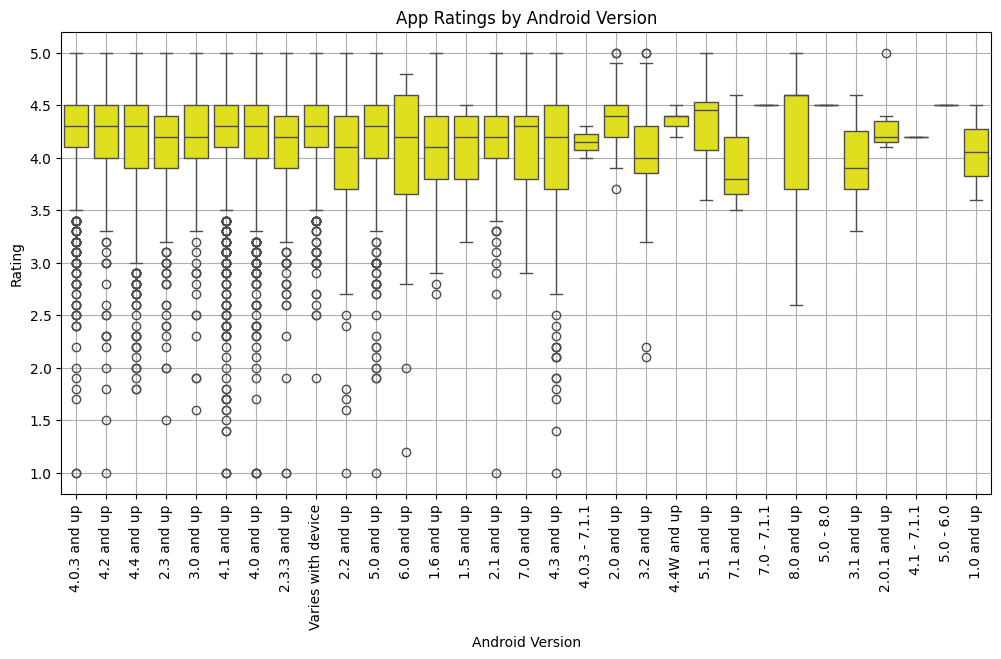

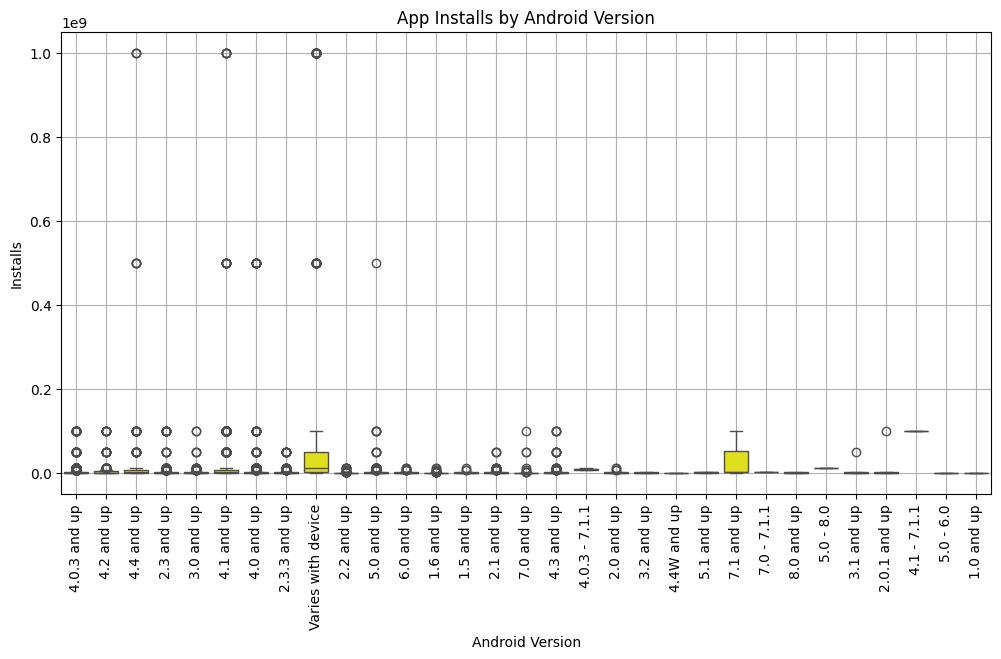

In [33]:
#Ratings by Android Version
plt.figure(figsize=(12, 6))
sns.boxplot(x='Android Ver', y='Rating', data=data, color = 'yellow')
plt.title('App Ratings by Android Version')
plt.xlabel('Android Version')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#Installs by Android Version
plt.figure(figsize=(12, 6))
sns.boxplot(x='Android Ver', y='Installs', data=data, color = 'yellow')
plt.title('App Installs by Android Version')
plt.xlabel('Android Version')
plt.ylabel('Installs')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**6. Impact of Reviews on Ratings**

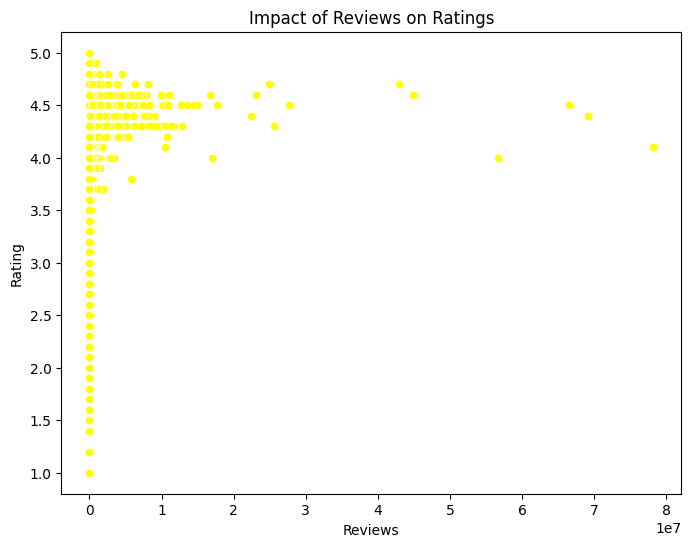

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Reviews', y='Rating', data=data, color = 'yellow')
plt.title('Impact of Reviews on Ratings')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.show()